<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_web_korpusz_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB lapról korpusz gyüjtés

## Szöveg elemzés:

**korpusz** – Nyelvészeti céllal összegyűjtött nagy mennyiségű szöveg vagy szövegek összessége. 

A korpusz egyik fontos tulajdonsága a mérete, azonban a használhatóságát nagyban befolyásolja a kiegyensúlyozottsága: a szövegei mennyire reprezentatívak. 

A többféle forrásból és változatos műfajból származó szövegekből felépülő korpusz általában jobban reprezentálja a nyelvet, általános nyelvészeti kutatásokat jobban ki tud szolgálni.


Ez lehetőséget ad arra, hogy megvizsgáljuk az adott nyelv gyakori struktúráit és ezek időbeli változásait. Használunk a szótövesítés, az ékezetesítés,  a főnévicsoport- felismerés és a mondatvázak módszertanokat is.
 
A Biblia, az egyik legrégebbi és legjobban elemezett korpusz: kb. 600.000 szóból áll.

Az internetről elérhető nagyméretű korpuszt hogyan használhatjuk, miként fedezhetjük fel benne a főnévi csoportok és mondatok leggyakoribb mintáit. 

Fel kell arra is készülni, hogy  a nyelv folyamatosan változik, él
, tehát új kifejezések jelennek meg, mások eltűnnek. 

A web szövegeinek előnye a méretén túl az is, hogy a segítségükkel időbeli változásokat (trendek, gyorsan elterjedő új kifejezések) is ki lehet mutatni.

Elvárás lehet tovbbá a szöveg kohéziója, bekezdések és azokon belül a mondatok összefüggése, a duplikátum-mentesség elérése, a minél tisztább, zaj- és reklámmentes, homogén nyelvű szöveg.


Informáió, forrás:

http://corpus.tools/wiki/Justext

https://nlp.fi.muni.cz/projects/justext/


In [12]:
## !pip install justext  ## csak egyszer telepítésnél
import requests
import justext

response = requests.get("https://mierdekel.hu/blog/category/stat/")
paragraphs = justext.justext(response.content, justext.get_stoplist("Hungarian"))  # English, Hungarian
for paragraph in paragraphs:
    print (paragraph.text)
    
    

mierdekel.hu Blog
mierdekel.hu Blog
Kilépés a tartalomba
Kezdőlap
Android
GDPR
Statisztika kategória bejegyzései
← Korábbi bejegyzés
MOL Bubi adatelemző verseny ‘körbejárása’
Közzétéve 2015-09-25 | Szerző:KL_szerzo
MOL Bubi üzemelése során összegyűlt nagyméretű adat elemzésének céljából a Budapesti Közlekedési Központ az MTA SZTAKI-val együttműködik és MOL Bubi adatelemzési versenyt hirdet ( BKK és a SZTAKI dolgozók kizárva ). A MOL Bubi adatelemző verseny három feladata: A kiválasztott tesztnapokon … Egy kattintás ide a folytatáshoz…. →
Kategória:Informatika, Oktatás, Statisztika|Címke:adatelemzés, bigdata, bubi, gps|Hozzászólás most!
Talend lte eszköz bemutatása
Közzétéve 2015-06-17 | Szerző:KL_szerzo
A Talend egyedüli OpenSource szállítóként bekerült a Gartner DataIntegration Magic Quadrant-ba. Érdekes fizetős termékük az adat minőség management (DQM) megoldásuk, ami önállóan és a Talend-es job-okba integráltan is tud működni. A szokásos “gyors” rendszer integrációs feladatoknál tud

# JusText algoritmus 
## (Pomikálek 2011)

A JusText algoritmus  a HTML-tartalmat bekezdésekre bontja a szöveget tartalmazó címkék mentén. 

Minden egységben megszámolja a benne szereplő szavak, linkek és stopword-ök számát. 

*(A stopword azokat a szavakat jelenti, amelyeket egy rendszer figyelmen kívül hagy a feldolgozás során. Általában ezek egy nyelv leggyakoribb szavai (a, az, és, hogy stb.) és feladatonként eltérő lehet a listájuk.)*

Ezek alapján osztályozza őket: bizonyos küszöb mentén 
- jó, 
- majdnem jó 
- illetve rossz 
kategóriákba. 

Majd a jókkal körülvett majdnem jók szintén bekerülnek a jók közé, és így születik meg az értékes szöveg: a jó bekezdések. 

Az algoritmus elfogadható minőséget ad még extrém oldalakon is. 

In [19]:
## Segítség kiíratása
help(justext.justext)


Help on function justext in module justext.core:

justext(html_text, stoplist, length_low=70, length_high=200, stopwords_low=0.3, stopwords_high=0.32, max_link_density=0.2, max_heading_distance=200, no_headings=False, encoding=None, default_encoding='utf8', enc_errors='replace', preprocessor=<function preprocessor at 0x7f3c5c89f8c8>)
    Converts an HTML page into a list of classified paragraphs. Each paragraph
    is represented as instance of class ˙˙justext.paragraph.Paragraph˙˙.



# Lemmatizáció 


Lemmatizálónak nevezzük azokat az eszközöket, amelyek mindig a szótárírói hagyománynak megfelelő reprezentáns alakot, a lemmát adják vissza.


A lemmatizáló algoritmus lényege az, hogy a tő építésekor az abban szereplő morfémák felszíni alakját használjuk fel, kivéve az utolsó tőalkotó morfémát: ennek a szótári alakja szerepel a tőben. TeFontos kérdés, hogy mely morfémák számítanak tőalkotónak, és melyek nem.



## Stemmer

Stemmernek nevezünk minden olyan eszközt, amely valamilyen tőalakot létrehoz az adott szóalakhoz.
Itt fel kell készülni, hogy :
- a létrehozás bármiféle megszorítás nélkül történhet. 
- a talált alak valóban az adott lexéma paradigmájának valamelyik tagja legyen, vagy akár csak létező szóalak legyen az adott nyelven. 


Az általános, szótárt nem tartalmazó gyors algoritmikus tövesítő algoritmusok a szóalak csonkolásával gyakran ilyen tőalakokat hoznak létre.


Egy komplex szövegfeldolgozási feladat megoldása általában feltételez egy olyan algoritmust, amely képes a szövegekben szereplő szavak tövének vagy lehetséges töveinek megállapítására.


A bonyolult morfológiájú nyelvek esetében fontos szerepe lehet, hiszen egy-egy lexémának a szövegekben előforduló rengeteg különböző toldalékolt alakja lehet és csak így képezhető le egy közös formára, amelynek segítségével a ragozott alakok mind megtalálhatóak.



Általában egy szónak több is töve lehet, és ritka esetektől (például szóviccektől) eltekintve ezek közül csak egy a valódi töve egy adott környezetben. Azonban a tövesítő modulok bemenete általában csak egy szó (szövegkörnyezet nélkül), és az IR rendszerek architektúrája is szó alapon hívja a tövesítőket


In [82]:
## !pip install  nltk  ## csak egyszer kell installálni
## modul importálás
import requests
from bs4 import BeautifulSoup    

#import nltk
# nltk.download("stopwords")  ## Le kell tölteni a stop szavakat

## deffinicio
def Get_kl_beautibulsoup():
    page = requests.get("https://mierdekel.hu/blog/category/stat/")
#    print ( page.status_code) ## WEB lap státusz kódja : 200
#    print ( page.content)     ## WEB lap tartalom közvetlen kiíratása
    soup = BeautifulSoup(page.content, 'html.parser')
#    print (soup())            ## WEB lap tartalom közvetlen kiíratása
#    print(soup.prettify())    ## WEB lap tartalom közvetlen kiíratása
    soup = BeautifulSoup(page.content, 'html.parser')
    print("---1---")
    print (soup.find_all('p')[0].get_text())  ## Első bekezdés tartalma
    print("---2---")
    print (soup.find_all('p')[1].get_text())  ## Második bekezdés tartalma
    print("---3---")
    print (soup.find_all('p')[2].get_text())  ## Harmadik bekezdés tartalma
    print("--4----")
    txt=  (soup.find_all('p')[3].get_text())
    print (txt)  ## Negyedik bekezdés tartalma
    print("---Vége---")
    
  
## használat
if __name__ =="__main__":
     Get_kl_beautibulsoup()
 
    
    





---1---
MOL Bubi üzemelése során összegyűlt nagyméretű adat elemzésének céljából a Budapesti Közlekedési Központ az MTA SZTAKI-val együttműködik és MOL Bubi adatelemzési versenyt hirdet ( BKK és a SZTAKI dolgozók kizárva ). A MOL Bubi adatelemző verseny három feladata: A kiválasztott tesztnapokon … Egy kattintás ide a folytatáshoz…. →
---2---
A Talend egyedüli OpenSource szállítóként bekerült a Gartner DataIntegration Magic Quadrant-ba. Érdekes fizetős termékük az adat minőség management (DQM) megoldásuk, ami önállóan és a Talend-es job-okba integráltan is tud működni. A szokásos “gyors” rendszer integrációs feladatoknál tud nagyon eredményes lenni. … Egy kattintás ide a folytatáshoz…. →
---3---
Nyílt szabványok és a WebGIS – OGC: Open Geospatial Consortium, non-profit, nemzetközi konzorcium, mely élen jár földrajzi, illetve térbeli adatokhoz kötődő szabványok fejlesztésében – A legfontosabb OGC szabványok térbeli adatok webes publikálásához kötődnek, ezek a WMS, WFS, WCS – WMS: … Egy 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Gutenberg: ADVICE


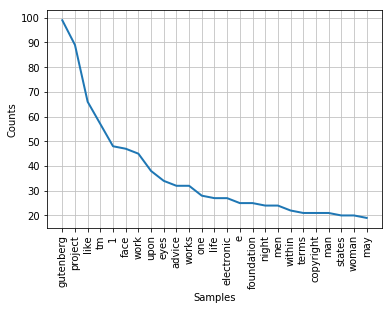

Mierdekel.hu


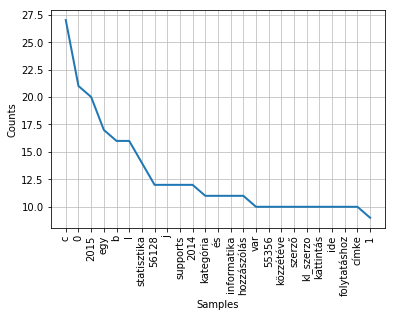

In [85]:
import requests
from bs4 import BeautifulSoup    
import nltk

nltk.download("stopwords")  ## Le kell tölteni a stop szavakat

from nltk.tokenize import RegexpTokenizer

def kl_plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)
    
## használat  
print('Gutenberg: ADVICE')
kl_plot_word_freq('https://www.gutenberg.org/files/60252/60252-h/60252-h.htm')

print('Mierdekel.hu')
kl_plot_word_freq('https://mierdekel.hu/blog/category/stat/')
